# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [4]:
# Write your code here
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from xgboost import XGBClassifier


In [13]:

# Read the training data
train_df = pd.read_csv('/content/stsa-train.txt', sep='delimiter=', header=None, names=['Text'], engine='python')
train_df[['Sentiment', 'Text']] = train_df["Text"].str.extract(r'^(\d+)\s+(.*)$')
train_df.head()

# Read the test data
test_df = pd.read_csv('/content/stsa-train.txt', sep='delimiter=', header=None, names=['Text'], engine='python')
test_df[['Sentiment', 'Text']] = test_df["Text"].str.extract(r'^(\d+)\s+(.*)$')
test_df.head()



,Text,Sentiment
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting-room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1


In [14]:
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
w_l= WordNetLemmatizer()
def clean_text(txt):
  txt="".join([w.lower() for w in txt if w not in string.punctuation])
  txt = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", txt)
  tok = re.split('\W+',txt)
  txt = [w_l.lemmatize(w1) for w1 in tok if w1 not in stopword]
  return txt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('omw-1.4')
tf_vect = TfidfVectorizer(analyzer = clean_text)
X_idf = tf_vect.fit_transform(train_df['Text'])
print(X_idf.shape)
X_idf_df=pd.DataFrame(X_idf.toarray())
X_idf_df.columns=tf_vect.get_feature_names_out()
X_test_idf = tf_vect.transform(test_df['Text'])
print(X_idf.shape)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


(6920, 13343)
(6920, 13343)


In [16]:

x_train, x_test, y_train, y_test = train_test_split(X_idf_df, train_df['Sentiment'].values,
                                                test_size=0.2, random_state=42)

In [18]:
#MNB
MNB = MultinomialNB()
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
MNB_test = MNB.fit(x_train,y_train)
Y_MNB = MNB_test.predict(x_test)
print('Accuracy %s' % accuracy_score(Y_MNB,y_test))
print(classification_report(y_test,Y_MNB))
sco_MNB = cross_val_score(MNB, x_test, y_test, cv=10)
print("Accuracy with MNB",sco_MNB.mean())

Accuracy 0.7955202312138728
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       671
           1       0.76      0.88      0.82       713

    accuracy                           0.80      1384
   macro avg       0.80      0.79      0.79      1384
weighted avg       0.80      0.80      0.79      1384

Accuracy with MNB 0.7247054530288813


In [19]:
#SVM TEST
SVM = LinearSVC()
SVM_test = SVM.fit(x_train,y_train)
Y_SVM = SVM_test.predict(x_test)
print('Accuracy %s' % accuracy_score(Y_SVM,y_test))
print(classification_report(y_test,Y_SVM))
sco_SVM = cross_val_score(SVM, x_test, y_test, cv=10)
print("Accuracy with SVM",sco_SVM.mean())

Accuracy 0.791907514450867
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       671
           1       0.78      0.83      0.80       713

    accuracy                           0.79      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384

Accuracy with SVM 0.7348034615785632


In [20]:
#KNN_test
KNN = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
KNN_test = KNN.fit(x_train,y_train)
Y_KNN = KNN_test.predict(x_test)
print('Accuracy %s' % accuracy_score(Y_KNN,y_test))
print(classification_report(y_test,Y_KNN))
scores_KNN = cross_val_score(KNN, x_test, y_test, cv=10)
print("Accuracy with KNN",scores_KNN.mean())

Accuracy 0.740606936416185
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       671
           1       0.74      0.77      0.75       713

    accuracy                           0.74      1384
   macro avg       0.74      0.74      0.74      1384
weighted avg       0.74      0.74      0.74      1384

Accuracy with KNN 0.6675737670732979


In [21]:
#Decison tree
DTC = DecisionTreeClassifier()
dt = DecisionTreeClassifier()
dec_tree_test = dt.fit(x_train,y_train)
Y_dec_tree = dec_tree_test.predict(x_test)
print('Accuracy %s' % accuracy_score(Y_dec_tree,y_test))
print(classification_report(y_test,Y_dec_tree))
scores_DT = cross_val_score(dt, x_test, y_test, cv=10)
print("Accuracy with decision trees",scores_DT.mean())

Accuracy 0.6567919075144508
              precision    recall  f1-score   support

           0       0.65      0.62      0.64       671
           1       0.66      0.69      0.67       713

    accuracy                           0.66      1384
   macro avg       0.66      0.66      0.66      1384
weighted avg       0.66      0.66      0.66      1384

Accuracy with decision trees 0.6046866854342613


In [22]:
#Randomforest
rf = RandomForestClassifier()
RF_test = rf.fit(x_train,y_train)
Y_RF = RF_test.predict(x_test)
print('Accuracy %s' % accuracy_score(Y_RF,y_test))
print(classification_report(y_test,Y_RF))
sco_RF = cross_val_score(rf, x_test, y_test, cv=10)
print("Accuracy with Random Forest",sco_RF.mean())

Accuracy 0.7442196531791907
              precision    recall  f1-score   support

           0       0.78      0.66      0.72       671
           1       0.72      0.82      0.77       713

    accuracy                           0.74      1384
   macro avg       0.75      0.74      0.74      1384
weighted avg       0.75      0.74      0.74      1384

Accuracy with Random Forest 0.6690126159941612


In [23]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)
xgb = XGBClassifier()
# Now fit the XGBoost model
XGB_test = xgb.fit(x_train, y_train)
Y_XGB = XGB_test.predict(x_test)
print('Accuracy %s' % accuracy_score(Y_XGB,y_test))
print(classification_report(y_test,Y_XGB))
sco_XGB = cross_val_score(xgb, x_test, y_test, cv=10)
print("Accuracy using XGBoost",sco_XGB.mean())

Accuracy 0.7189306358381503
              precision    recall  f1-score   support

           0       0.77      0.60      0.67       671
           1       0.69      0.83      0.75       713

    accuracy                           0.72      1384
   macro avg       0.73      0.72      0.71      1384
weighted avg       0.73      0.72      0.71      1384

Accuracy using XGBoost 0.6445000521322073


In [24]:
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
import numpy as np

# Preprocessing
train_df['Cleaned_Text'] = train_df['Text'].apply(clean_text)

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=train_df['Cleaned_Text'], vector_size=100, window=5, min_count=1, workers=4)

# Convert each review to a vector representation
def word2vec_vectorizer(tokens, model, vector_size):
    vector = np.zeros(vector_size)
    num_words = 0
    for word in tokens:
        if word in model.wv:
            vector += model.wv[word]
            num_words += 1
    if num_words != 0:
        vector /= num_words
    return vector

train_vectors = np.array([word2vec_vectorizer(tokens, word2vec_model, 100) for tokens in train_df['Cleaned_Text']])

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(train_vectors, train_df['Sentiment'].values,
                                                    test_size=0.2, random_state=42)

# Train a classifier (for example, SVM)
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)

# Evaluate the classifier
from sklearn.metrics import accuracy_score, classification_report
y_pred = svm_classifier.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5245664739884393
              precision    recall  f1-score   support

           0       0.61      0.06      0.10       671
           1       0.52      0.97      0.68       713

    accuracy                           0.52      1384
   macro avg       0.56      0.51      0.39      1384
weighted avg       0.56      0.52      0.40      1384



In [ ]:
!pip install transformers

import torch
from transformers import DistilBertTokenizer, DistilBertModel
from sklearn.model_selection import train_test_split
import numpy as np

# Load pre-trained DistilBERT model and tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# Preprocessing
train_df['Encoded_Text'] = train_df['Text'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True, truncation=True, padding=True))

# Convert tokens to tensors
train_tensors = [torch.tensor(text) for text in train_df['Encoded_Text']]

# Pad sequences to have the same length
max_length = max([len(text) for text in train_tensors])
train_tensors = [torch.nn.functional.pad(text, (0, max_length - len(text))) for text in train_tensors]

# Convert tensors to DistilBERT embeddings
with torch.no_grad():
    embeddings = []
    for text in train_tensors:
        outputs = model(text.unsqueeze(0))
        embeddings.append(outputs[0][:, 0, :].squeeze().numpy())  # Extracting the pooled output (CLS token)

train_distilbert_vectors = np.array(embeddings)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(train_distilbert_vectors, train_df['Sentiment'].values,
                                                    test_size=0.2, random_state=42)

# Train a classifier (for example, SVM)
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)

# Evaluate the classifier
from sklearn.metrics import accuracy_score, classification_report
y_pred = svm_classifier.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [28]:
# Write your code here
import pandas as pd
df = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv', encoding='utf-8')
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


[(0.4, 0.7607843137254902, 0.6470588235294118), (0.9882352941176471, 0.5529411764705883, 0.3843137254901961), (0.5529411764705883, 0.6274509803921569, 0.796078431372549), (0.9058823529411765, 0.5411764705882353, 0.7647058823529411), (0.6509803921568628, 0.8470588235294118, 0.32941176470588235), (1.0, 0.8509803921568627, 0.1843137254901961), (0.8980392156862745, 0.7686274509803922, 0.5803921568627451), (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]


<ipython-input-86-a83d4eff2303>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette=custom_palette)
<ipython-input-86-a83d4eff2303>:6: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.countplot(x='Rating', data=df, palette=custom_palette)


<Axes: xlabel='Rating', ylabel='count'>

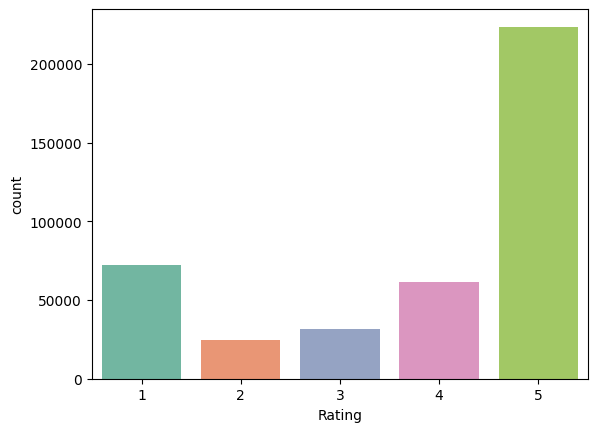

In [86]:
import seaborn as sns

# Define your custom palette
custom_palette = sns.color_palette("Set2")
print(custom_palette)
sns.countplot(x='Rating', data=df, palette=custom_palette)


In [80]:
def part(x1):
    if x1 < 3:
        return 'negative'
    return 'positive'
act_Sco = df['Rating']
posNeg = act_Sco.map(part)
df['RatingPosNeg'] = posNeg

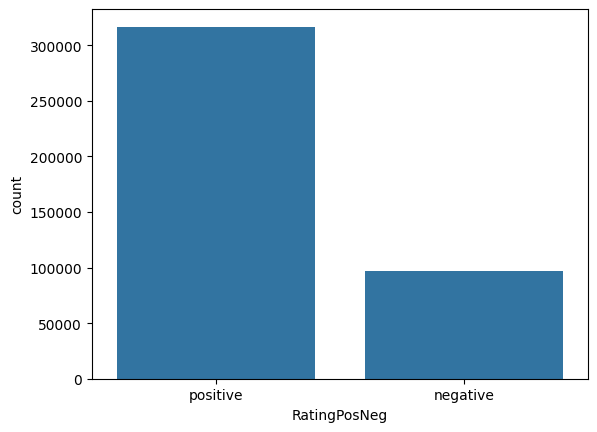

In [81]:
import matplotlib.pyplot as plt
# Check for missing values in the 'RatingPosNeg' column
missing_values = df['RatingPosNeg'].isnull().sum()
if missing_values > 0:
    # If there are missing values, fill them with a default value or handle them in a way that makes sense for your analysis
    df['RatingPosNeg'].fillna('Unknown', inplace=True)
# Now you can use sns.countplot
sns.countplot(x='RatingPosNeg', data=df)

# Show the plot
plt.show()

In [35]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sno = nltk.stem.SnowballStemmer('english')
st=set(stopwords.words('english'))

fi = df
def clpunc(se):
    clean_data = re.sub(r'[?|!|\'|"|#]',r'',se)
    clean_data = re.sub(r'[.|,|)|(|\|/]',r' ',clean_data)
    return  clean_data


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
 final = df.sample(n=10000, random_state=1)

In [37]:
import re
i=0
st1=' '
final_str=[]
all_positive_words=[]
all_negative_words=[]
s1=''
for se in final['Reviews'].values:
    fil_se=[]
    try:
      for w in se.split():
          for c in clpunc(w).split():
              if((c.isalpha()) & (len(c)>2)):
                  if(c.lower() not in st):
                      s=(sno.stem(c.lower())).encode('utf8')
                      fil_se.append(s)
                      if (final['RatingPosNeg'].values)[i] == 'positive':
                          all_positive_words.append(s)
                      if(final['RatingPosNeg'].values)[i] == 'negative':
                          all_negative_words.append(s)
                  else:
                      continue
              else:
                  continue
      str1 = b" ".join(fil_se)

      final_str.append(str1)
      i+=1
    except AttributeError as e:
      final_str.append('')
      i+=1

In [38]:
final['CleanedText']=final_str
final['CleanedText']=final['CleanedText'].str.decode("utf-8")
final = final.fillna('')
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bo = count_vect.fit_transform(final['CleanedText'].values)
print(bo.shape)

(10000, 8444)


In [40]:
term = count_vect.get_feature_names_out()

In [41]:
from sklearn.cluster import KMeans
mod = KMeans(n_clusters=10,init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=99, copy_x=True, algorithm='auto')
mod.fit(bo)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='auto', n_clusters=10, n_init=10, random_state=99)

In [42]:
lab = mod.labels_
cluster_center=mod.cluster_centers_

In [43]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bo, lab, metric='euclidean')
silhouette_score

0.05966779231634766

In [44]:
df2 = final
df2['Bow Clus Label'] = mod.labels_
df2.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,1
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank,4


In [45]:
df2.groupby(['Bow Clus Label'])['Reviews'].count()

Bow Clus Label
0     169
1    3558
2       1
3       2
4    4927
5       6
6       1
7     297
8      68
9     971
Name: Reviews, dtype: int64

In [46]:
print("Top terms per cluster:")
ord_centroids = mod.cluster_centers_.argsort()[:, ::-1]
for i1 in range(10):
    print("Cluster %d:" % i1, end='')
    for i in ord_centroids[i1, :10]:
        print(' %s' % term[i], end='')
        print()

Top terms per cluster:
Cluster 0: phone
 use
 screen
 get
 like
 app
 good
 batteri
 work
 camera
Cluster 1: phone
 work
 great
 good
 use
 love
 one
 like
 batteri
 get
Cluster 2: appl
 iphon
 android
 phone
 samsung
 year
 even
 version
 compani
 know
Cluster 3: use
 app
 favorit
 screen
 phone
 display
 one
 great
 recent
 back
Cluster 4: good
 work
 great
 product
 excel
 love
 use
 like
 perfect
 iphon
Cluster 5: phone
 use
 app
 android
 screen
 get
 one
 card
 batteri
 good
Cluster 6: phone
 one
 use
 issu
 band
 like
 far
 app
 good
 usa
Cluster 7: phone
 use
 work
 like
 get
 one
 screen
 batteri
 would
 good
Cluster 8: phone
 use
 like
 one
 get
 screen
 work
 app
 dont
 camera
Cluster 9: phone
 work
 use
 great
 good
 one
 get
 like
 would
 screen


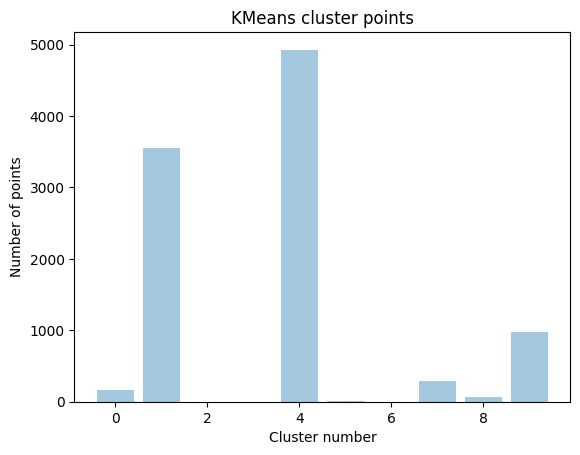

In [47]:
import matplotlib.pyplot as plt
plt.bar([x1 for x1 in range(10)], df2.groupby(['Bow Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
idf_vect = TfidfVectorizer()
idf = idf_vect.fit_transform(final['CleanedText'].values)
idf.shape

(10000, 8444)

In [49]:
from sklearn.cluster import KMeans
mod = KMeans(n_clusters = 10,random_state=99)
mod.fit(idf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=99)

In [50]:
lab_tf = mod.labels_
cluster_center_tf=mod.cluster_centers_
cluster_center_tf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
ter = idf_vect.get_feature_names_out()
ter[1:10]

array(['aac', 'aand', 'ab', 'abandon', 'abc', 'abd', 'abeautifulit',
       'abierto', 'abil'], dtype=object)

In [52]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(idf, lab_tf, metric='euclidean')
silhouette_score_tf

0.06723612238674714

In [53]:
df3 = df2
df3['Tfidf Clus Label'] = mod.labels_
df3.head(5)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label,Tfidf Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,1,4
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank,4,1
40075,Apple iPhone 5s 16GB (Silver) - T-Mobile,Apple,75.65,1,"the back camera stopped working, the phone tou...",1.0,negative,back camera stop work phone touch screen stop ...,9,4
100790,Blackberry Torch 9800 Unlocked Phone with 5 MP...,BlackBerry,82.62,5,Good!,0.0,positive,good,4,9
58055,Apple iPhone 6 Plus 64GB Unlocked Smartphone -...,,529.99,5,no complaints. worked fine and still working p...,0.0,positive,complaint work fine still work perfect tear we...,1,5


In [54]:
df3.groupby(['Tfidf Clus Label'])['Reviews'].count()

Tfidf Clus Label
0     431
1     181
2     360
3     295
4    3666
5    4065
6     167
7     268
8     172
9     395
Name: Reviews, dtype: int64

In [55]:
print("Top terms per cluster:")
order_centroids = mod.cluster_centers_.argsort()[:, ::-1]
for i1 in range(10):
    print("Cluster %d:" % i1, end='')
    for i in order_centroids[i1, :10]:
        print(' %s' % ter[i], end='')
        print()

Top terms per cluster:
Cluster 0: great
 phone
 work
 price
 product
 condit
 buy
 deal
 good
 far
Cluster 1: thank
 good
 excel
 great
 much
 product
 love
 phone
 work
 everyth
Cluster 2: excel
 product
 phone
 recommend
 love
 good
 seller
 price
 purchas
 servic
Cluster 3: love
 phone
 great
 new
 good
 daughter
 son
 iphon
 absolut
 gift
Cluster 4: phone
 use
 work
 great
 good
 one
 like
 batteri
 get
 love
Cluster 5: work
 good
 like
 product
 expect
 use
 great
 phone
 well
 iphon
Cluster 6: nice
 phone
 good
 work
 product
 love
 fast
 look
 price
 recommend
Cluster 7: perfect
 work
 condit
 phone
 product
 love
 great
 everyth
 excel
 came
Cluster 8: excelent
 producto
 telefono
 celular
 recomendado
 telfono
 súper
 punto
 recomienda
 tlf
Cluster 9: good
 phone
 product
 price
 condit
 far
 work
 qualiti
 realli
 cell


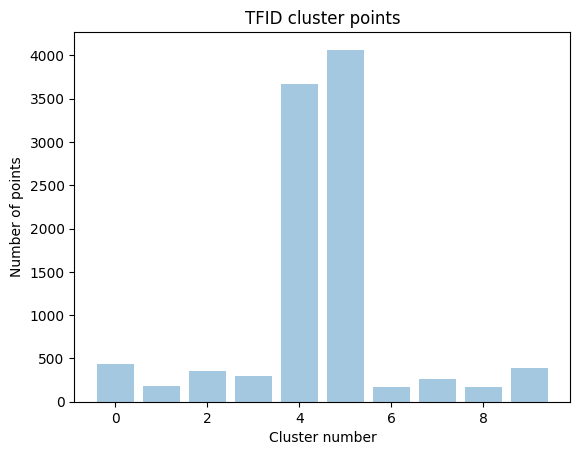

In [56]:
plt.bar([x1 for x1 in range(10)], df3.groupby(['Tfidf Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('TFID cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [57]:
i1=0
lst_of_sent=[]
for se in final['CleanedText'].values:
    lst_of_sent.append(se.split())

In [58]:
i1=0
lst_sent_tr=[]
for s in final['CleanedText'].values:
    filter_sen=[]
    for w in se.split():
        for cle in clpunc(w).split():
            if(cle.isalpha()):
                filter_sen.append(cle.lower())
            else:
                continue
    lst_sent_tr.append(filter_sen)
print(lst_sent_tr)

[['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'pa

In [59]:
import gensim
w2v_mod=gensim.models.Word2Vec(lst_sent_tr, workers=4)

In [60]:
import numpy as np
se_vecs = [];
for se in lst_sent_tr:
    se_vec = np.zeros(100)
    cnt_words =0;
    for word in se:
        try:
            vec = w2v_mod.wv[word]
            se_vec += vec
            cnt_words += 1
        except:
            pass
    se_vec /= cnt_words
    se_vecs.append(se_vec)
se_vecs = np.array(se_vecs)
se_vecs = np.nan_to_num(se_vecs)
se_vecs.shape

(10000, 100)

In [61]:
n_clu = [x1 for x1 in range(3,11)]
n_clu

[3, 4, 5, 6, 7, 8, 9, 10]

In [62]:
squared_errors = []
for cluster in n_clu:
    kmeans = KMeans(n_clusters = cluster).fit(se_vecs)
    squared_errors.append(kmeans.inertia_)
optimal_clusters = np.argmin(squared_errors) + 2
print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-62-1e8e34ac2123>:3: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters = cluster).fit(se_vecs)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-62-1e8e34ac2123>:3: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters = cluster).fit(se_vecs)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value o

The optimal number of clusters obtained is -  2
The loss for optimal cluster is -  0.0


<ipython-input-62-1e8e34ac2123>:3: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters = cluster).fit(se_vecs)


In [63]:
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = optimal_clusters)
model2.fit(se_vecs)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-63-a5ea9372c7a3>:3: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  model2.fit(se_vecs)


KMeans(n_clusters=2)

In [64]:
word_cluster_pred=model2.predict(se_vecs)
word_cluster_pred_2=model2.labels_
word_cluster_center=model2.cluster_centers_
word_cluster_center[1:2]

array([[-0.18286288,  0.13827242,  0.04307073,  0.12366361,  0.06510635,
        -0.00785029,  0.19627738,  0.1429812 , -0.22003239, -0.08157712,
         0.06096789, -0.06755875,  0.0142706 ,  0.02784451,  0.08626814,
        -0.07368728,  0.13988673,  0.11601368, -0.23909266, -0.2134515 ,
        -0.00148691, -0.01629435,  0.35402981, -0.04028509,  0.00060064,
         0.03528102,  0.0303577 ,  0.06104946, -0.1682695 ,  0.0715732 ,
         0.17524757, -0.1125186 , -0.02930518, -0.17820422, -0.01425941,
         0.09529491,  0.08875557,  0.03048891, -0.0165853 , -0.00694331,
         0.11681516, -0.07404553, -0.14625075,  0.01712098,  0.15244896,
         0.04330013, -0.03729617,  0.01544154,  0.02190706, -0.04269196,
         0.02871248, -0.12129332, -0.02272671, -0.1325767 , -0.1590908 ,
        -0.05544882,  0.02838843, -0.08331793, -0.06922429, -0.07689937,
         0.03975955, -0.08211598,  0.18845728, -0.06988657, -0.07448846,
         0.147024  ,  0.04563758,  0.23046903, -0.2

In [65]:
df2 = df3
df2['AVG-W2V Clus Label'] = model2.labels_
df2.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,1,4,0
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank,4,1,0


In [66]:
from sklearn.cluster import DBSCAN
mi_Pts = 2 * 100
def low_bound(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r:
        mi_tr = int(l + (r - l) / 2)
        if nums[mi_tr] >= target:
            r = mi_tr - 1
        else:
            l = mi_tr + 1
    return l
def compute200thnearestneighbour(x, data):
    dists1 = []
    for val in data:
        dist = np.sum((x - val) **2 )
        if(len(dists1) == 200 and dists1[199] > dist):
            l = int(low_bound(dists1, dist))
            if l < 200 and l >= 0 and dists1[l] > dist:
                dists1[l] = dist
        else:
            dists1.append(dist)
            dists1.sort()

    return dists1[199]

In [67]:
two_hund_neigh = []
for v1 in se_vecs[:1500]:
    two_hund_neigh.append( compute200thnearestneighbour(v1, se_vecs[:1500]) )
two_hund_neigh.sort()
mod_DB = DBSCAN(eps = 5, min_samples = mi_Pts, n_jobs=-1)
mod_DB.fit(se_vecs)

DBSCAN(eps=5, min_samples=200, n_jobs=-1)

In [68]:
df_db = df2
df_db['AVG-W2V Clus Label'] = mod_DB.labels_
df_db.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,1,4,0
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank,4,1,0


<ipython-input-85-f506ffe24e16>:3: UserWarning: The palette list has more values (12) than needed (5), which may not be intended.
  sns.countplot(x='Tfidf Clus Label', data=df_db, palette=custom_palette, hue='Rating')


<Axes: xlabel='Tfidf Clus Label', ylabel='count'>

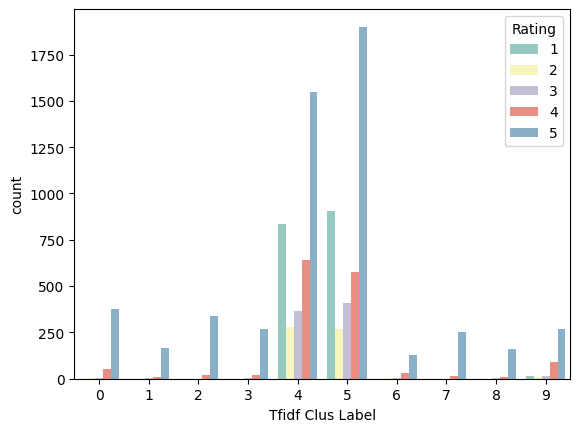

In [85]:
custom_palette = sns.color_palette("Set3")
#sns.countplot(x='Rating', data=df1, palette=custom_palette, hue='Rating')
sns.countplot(x='Tfidf Clus Label', data=df_db, palette=custom_palette, hue='Rating')

In [70]:
df2.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0    10000
Name: Reviews, dtype: int64

In [71]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve
Agg=cluster.fit_predict(se_vecs)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [72]:
agg_dafrme_a = df_db
agg_dafrme_a['AVG-W2V Clus Label'] = cluster.labels_
agg_dafrme_a.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,1,4,0
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank,4,1,0


In [73]:

agg_dafrme_a.groupby(['AVG-W2V Clus Label'])['Reviews'].count()



AVG-W2V Clus Label
0    9996
1       1
2       1
3       1
4       1
Name: Reviews, dtype: int64

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**
Clustering techniques like K-means, hierarchical clustering, and DBSCAN are used to group data points based on their similarities. K-means starts by grouping data according to similarity, where centroids are initially assigned randomly and then refined iteratively until they stabilize. The remaining points are then grouped with the nearest centroid. In contrast, DBSCAN is flexible, able to handle different cluster shapes by identifying sparse regions as noise and denser areas as clusters. Hierarchical clustering creates a hierarchical structure resembling a tree, merging the most similar data points or clusters to form a hierarchy. Each method has its unique strengths in capturing various aspects of relationships and data structures, meeting different clustering needs in data analysis




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
These exercises provided a comprehensive overview of various machine learning techniques,
 enhancing understanding of their applications and differences.


'''